# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [387]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
#!pip install gdown
#!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

In [389]:
import pandas as pd

In [391]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


## Importing Libraries

In [394]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [399]:
df.duplicated().sum()

0

In [400]:
#Checking catagories nums
for col in df.columns:
    print(col, df[col].nunique())

School_Year 4
Busbreakdown_ID 147972
Run_Type 10
Bus_No 10765
Route_Number 11283
Reason 10
Schools_Serviced 5180
Occurred_On 70108
Created_On 75822
Boro 11
Bus_Company_Name 91
How_Long_Delayed 1863
Number_Of_Students_On_The_Bus 123
Has_Contractor_Notified_Schools 2
Has_Contractor_Notified_Parents 2
Have_You_Alerted_OPT 2
Informed_On 75822
Incident_Number 4666
Last_Updated_On 145769
Breakdown_or_Running_Late 2
School_Age_or_PreK 2


In [403]:
#Checking for outliyers >> If there's a notible gap between mean and the median, it indicates a presence of an outliyer
df.describe().iloc[[1,5],:]

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
mean,1.287779e+06,3.590071
50%,1.287844e+06,0.000000


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [408]:
#Drop unwanted columns before imputing
df.drop(columns = ['Busbreakdown_ID', 'Bus_No', 'Occurred_On', 'Created_On', 'Informed_On', 'Incident_Number', 'Last_Updated_On'], inplace = True, axis = 1)

imputer = SimpleImputer(strategy='most_frequent')

#Apply impute on all features with the mode
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [414]:
#Reset the dtype of the int features >> For some reason it changes after applying the imputing operation
df['Number_Of_Students_On_The_Bus'] = df['Number_Of_Students_On_The_Bus'].astype(np.int64)

In [418]:
#One Hot Encoding columns of < 20 nunique values

df_objects = df.select_dtypes(include = 'object')
onehot_cols = []

for col in df_objects.columns:
    if df[col].nunique() < 20 and not 'Breakdown_or_Running_Late':
        onehot_cols.append(col)

df = pd.get_dummies(df, columns = onehot_cols)

In [420]:
#Rename values to fit into one catagory
df['How_Long_Delayed'].replace(['30MINS', '30 minutes', '25/30', '30-40MINS', '20-40', '30  min', '20-32MINS'], '30 MINS', inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_60528\90942340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['How_Long_Delayed'].replace(['30MINS', '30 minutes', '25/30', '30-40MINS', '20-40', '30  min', '20-32MINS'], '30 MINS', inplace = True)


In [422]:
# Assigning encoders and emputer
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()



In [424]:
#Encode the remain columns with ordinal encoder
ordinal_cols = df.select_dtypes(include = 'object')

for col in ordinal_cols.columns:
    df[col] = ordinal_encoder.fit_transform(df[[col]])

In [426]:
#Label Encodeing
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df[['Breakdown_or_Running_Late']])

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [430]:
X = df.drop(columns = 'Breakdown_or_Running_Late')
y = df[['Breakdown_or_Running_Late']]

In [432]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [471]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  float64
 1   Run_Type                         147972 non-null  float64
 2   Route_Number                     147972 non-null  float64
 3   Reason                           147972 non-null  float64
 4   Schools_Serviced                 147972 non-null  float64
 5   Boro                             147972 non-null  float64
 6   Bus_Company_Name                 147972 non-null  float64
 7   How_Long_Delayed                 147972 non-null  float64
 8   Number_Of_Students_On_The_Bus    147972 non-null  float64
 9   Has_Contractor_Notified_Schools  147972 non-null  float64
 10  Has_Contractor_Notified_Parents  147972 non-null  float64
 11  Have_You_Alerted_OPT             147972 non-null  float64
 12  Sc

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [448]:
model = Sequential()

model.add(Dense(8, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer = 'uniform'))

model.add(Dense(8, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))



C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [451]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 345 (1.35 KB)

 Trainable params: 345 (1.35 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [454]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split=.2)

Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8704 - loss: 0.4073 - val_accuracy: 0.9350 - val_loss: 0.1530
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9423 - loss: 0.1357 - val_accuracy: 0.9515 - val_loss: 0.1141
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9533 - loss: 0.1122 - val_accuracy: 0.9590 - val_loss: 0.1046
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9615 - loss: 0.0981 - val_accuracy: 0.9654 - val_loss: 0.0911
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9677 - loss: 0.0835 - val_accuracy: 0.9700 - val_loss: 0.0730
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9704 - loss: 0.0724 - val_accuracy: 0.9713 - val_loss: 0.0709
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9720 - loss: 0.0696 - val_accuracy: 0.9742 - val_loss: 0.0664
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9744 - loss: 0.0653 - 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [457]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (acc*100))
print("loss: %.2f%%" % (loss*100))

1157/1157 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9771 - loss: 0.0594
Accuracy: 97.65%
loss: 6.09%


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [460]:
y_pred = model.predict(X_test).round()

1157/1157 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

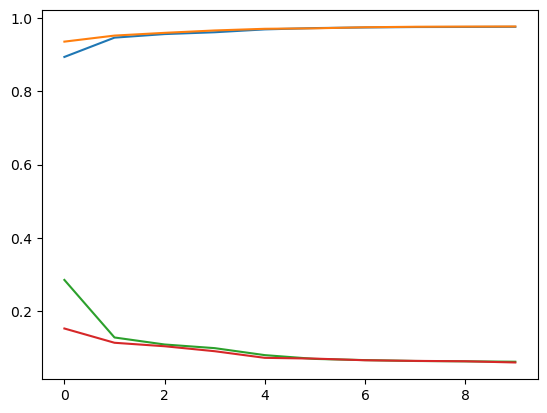

In [465]:
#acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

## Save the Model
Save the trained model for submission.

In [469]:
model.save('ANN_model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: